In [76]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [77]:
df =  pd.read_csv('CarPrice_Assignment.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [78]:
df.shape

(205, 26)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [80]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [81]:
# No missing values presen in data

In [82]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [83]:
df.duplicated().sum()

0

In [84]:
df.columns = df.columns.str.strip(' ').str.lower()
df.columns

Index(['car_id', 'symboling', 'carname', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [85]:
df['companyname'] = df['carname'].apply(lambda x: x.split(' ')[0])
df = df.drop('carname', axis=1)
df.head()

car_id  symboling fueltype aspiration doornumber      carbody drivewheel  \
0       1          3      gas        std        two  convertible        rwd   
1       2          3      gas        std        two  convertible        rwd   
2       3          1      gas        std        two    hatchback        rwd   
3       4          2      gas        std       four        sedan        fwd   
4       5          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  ...  fuelsystem  boreratio  stroke  \
0          front       88.6      168.8  ...        mpfi       3.47    2.68   
1          front       88.6      168.8  ...        mpfi       3.47    2.68   
2          front       94.5      171.2  ...        mpfi       2.68    3.47   
3          front       99.8      176.6  ...        mpfi       3.19    3.40   
4          front       99.4      176.6  ...        mpfi       3.19    3.40   

  compressionratio horsepower  peakrpm citympg  highwaympg    price  \
0              9.0        111     5000      21          27  13495.0   
1              9.0        111     5000      21          27  16500.0   
2              9.0        154     5000      19          26  16500.0   
3             10.0        102     5500      24          30  13950.0   
4              8.0        115     5500      18          22  17450.0   

   companyname  
0  alfa-romero  
1  alfa-romero  
2  alfa-romero  
3         audi  
4         audi  

[5 rows x 26 columns]

In [86]:
df['companyname'].replace('maxda','mazda',inplace=True)
df['companyname'].replace('porcshce','porsche',inplace=True)
df['companyname'].replace('toyouta','toyota',inplace=True)
df['companyname'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [87]:
df['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# There are a total of 22 unique car company names in the dataset.
# Thea 'CompanyName' column looks correct as there are no misspelled or duplicate names.
# There are no duplicate rows in the dataset.

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

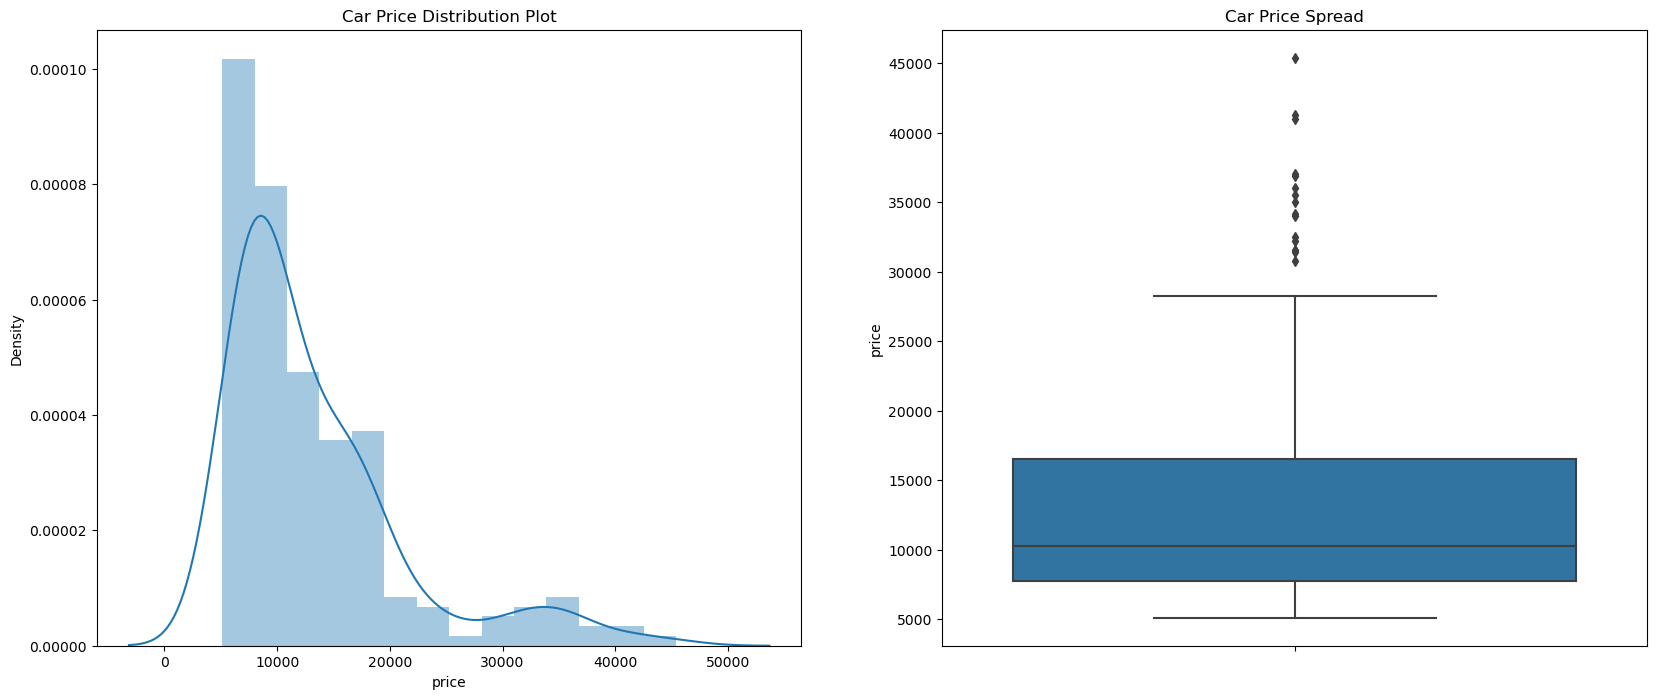

In [88]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["price"])

In [89]:
#The car price distribution plot is right-skewed, meaning that the data set's lower bounds are extremely low relative to the rest of the data.

In [90]:
df['price'] = np.log(df['price'])

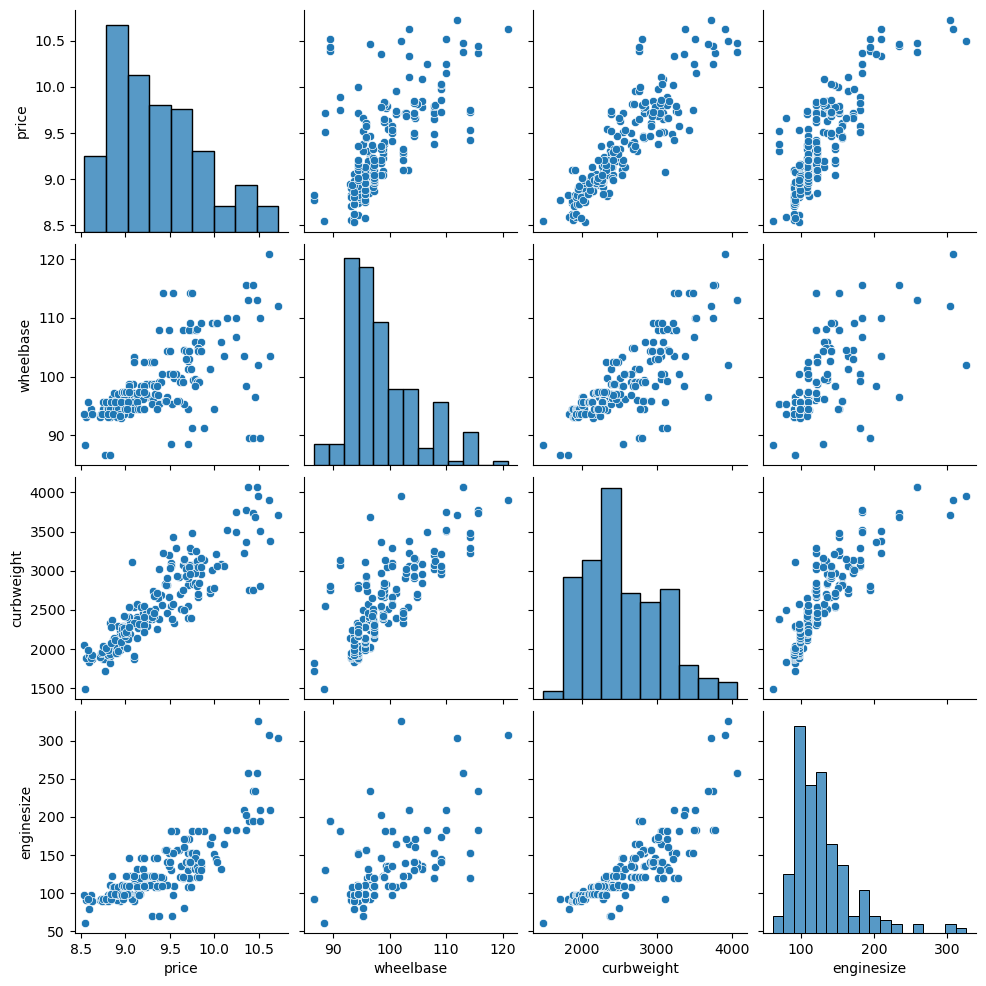

In [91]:
sns.pairplot(df, vars=['price', 'wheelbase', 'curbweight', 'enginesize'])
plt.show()

<AxesSubplot:>

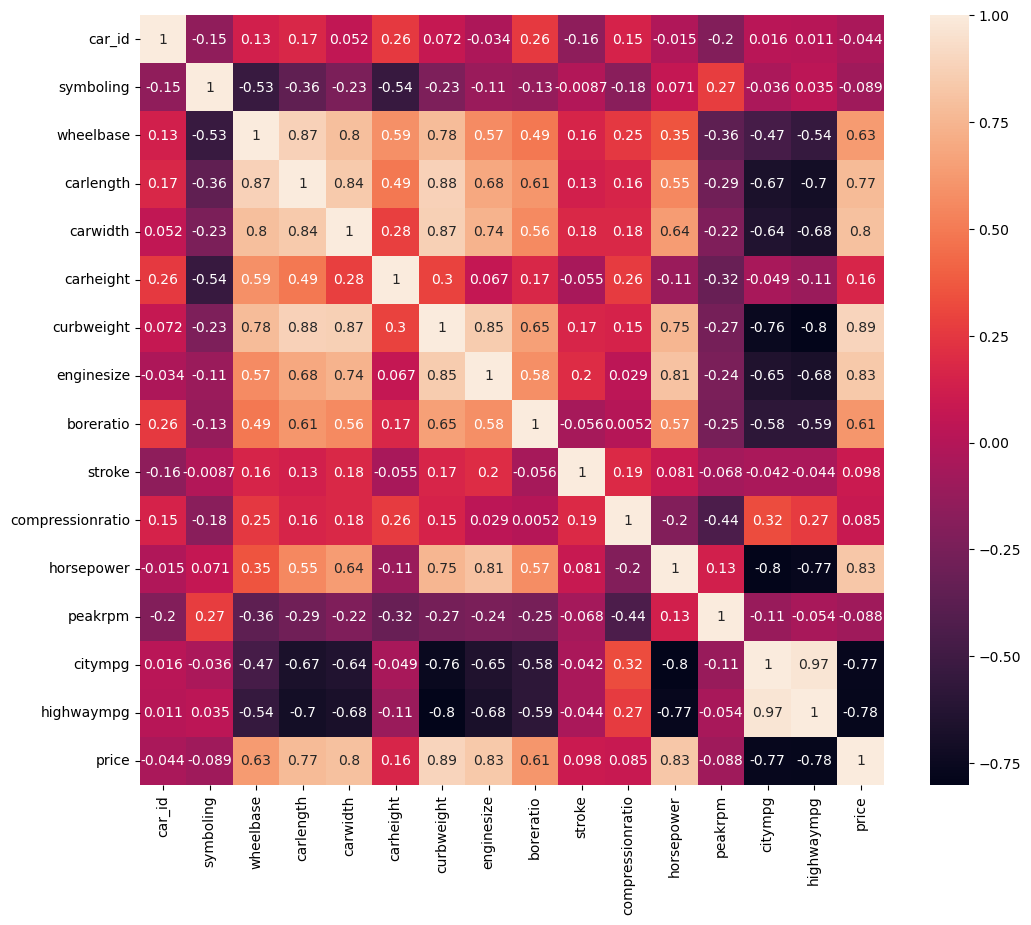

In [92]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True)

In [93]:
# Observations
# 'wheelbase', 'curbweight', and 'enginesize' have a positive linear relationship with 'price'.
# 'wheelbase' and 'curbweight' are highly correlated with each other.
# 'enginesize' and 'horsepower' are highly correlated with each other.
# 'carlength' and 'carwidth' are highly correlated with 'curbweight'.
# 'citympg' and 'highwaympg' are highly correlated with each other and negatively correlated with 'price'.


In [94]:
df.drop('car_id',axis=1,inplace=True)

In [95]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(exclude = np.number)

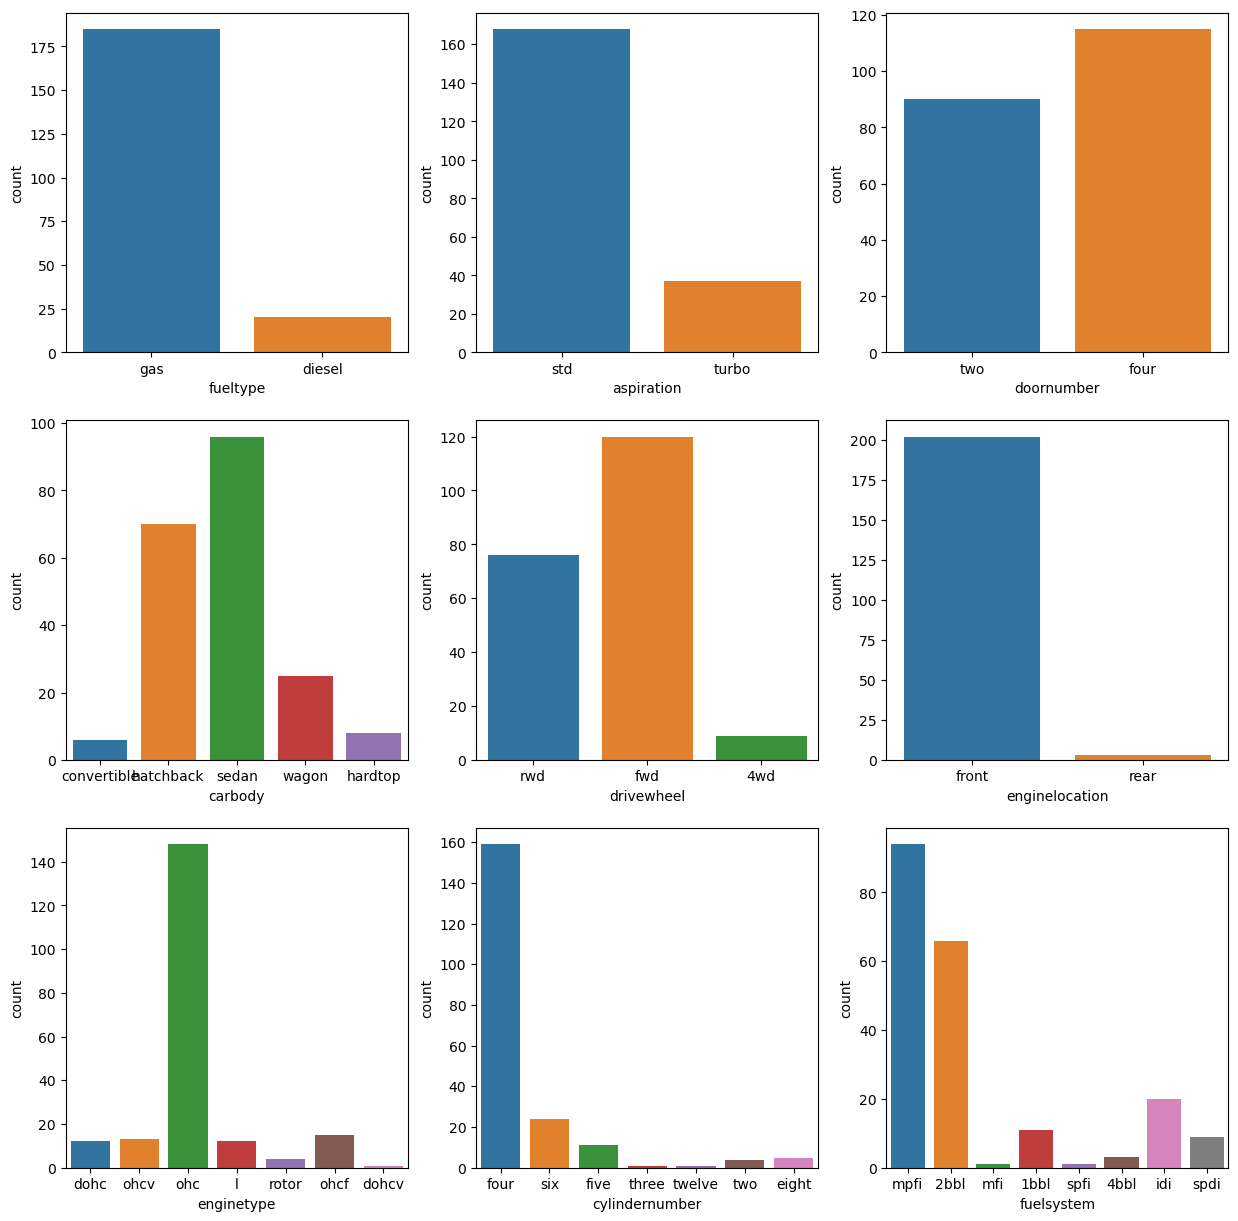

In [96]:
fig,ax= plt.subplots(3,3,figsize = (15,15))
for c,f in zip(df_cat.columns,ax.flatten()):
    sns.countplot(df_cat[c],ax=f)

In [97]:
#Sedan is the top carbody type preferred, followed by hatchback.
#Convertible and hardtop body type cars have a comparatively higher priced models in comparison to other carbody type 
#models, though there are some exceptions belonging to sedan, hatchback and wagon carbody type.
# Number of gas fueled cars are more than diesel fuel type cars; which amounts to approximately 90% of the car price records.
#Most of the cars have 'std'(standard) type aspiration.
#The standard type and turbo type have around 50% of the car models.
#Thus, making most of the std type less expensive though there are some exceptions seen.
# Around max car models have four doors.
#With respect to the car pricing, there is no significant difference in the price range. 
#The doornumber variable associated with the car is not affecting the price much.
#Around max car models have engine at the front.
#The rear engine cars are expensive in comparison to the front engine type cars.
#Most of the cars are front wheel drive, followed by rear wheel drive.
#Highest number of the cars have four cyclinders, followed by six cylinders and five cylinders type respectively.
#Most of the premium/highend price range cars have eight and twelvecylinders (narrow price range seen for the latter type).
# The top two type of fuel systems used in cars are mpfi is max and 2bbl respectively. 
#mpfi and idi fuel system cars have the highest price range
#ohc type seems to be the most favored type of engine. #
#Most of the economic budget cars have ohc and ohcf engine type in them and most of the premium/highend cars prefer 
#ohcv engine type.

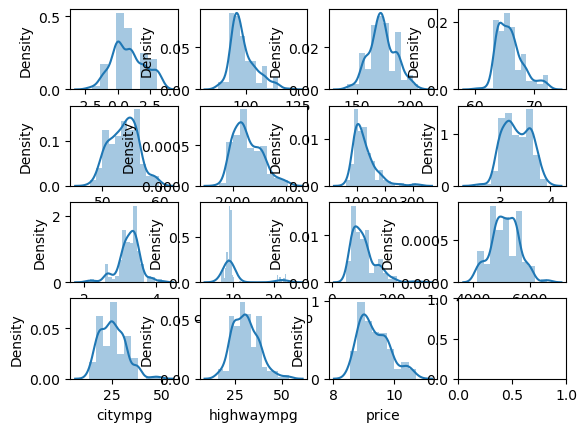

In [98]:
fig,ax= plt.subplots(4,4)
for c,f in zip(df_num,ax.flatten()):
    sns.distplot(df_num[c],ax=f)

In [99]:
#We see enginesize, horsepower and compression ratio variables to have a right skewed distribution,
#This is probably due to outliers in the variable.

In [100]:
df.symboling = df.symboling.map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [101]:
median_dict = df.groupby(['companyname'])[['price']].median().to_dict()
median_dict = median_dict['price']
median_dict

{'Nissan': 8.612321536507814,
 'alfa-romero': 9.711115659888671,
 'audi': 9.781884730776879,
 'bmw': 10.033171601409673,
 'buick': 10.400212688449432,
 'chevrolet': 8.747510946478448,
 'dodge': 8.937087036176523,
 'honda': 8.894944460956886,
 'isuzu': 9.095658771892568,
 'jaguar': 10.478695435231387,
 'mazda': 9.2681374707024,
 'mercury': 9.711297461543568,
 'mitsubishi': 9.047703788498627,
 'nissan': 9.017847259860732,
 'peugeot': 9.718963572186974,
 'plymouth': 8.937087036176523,
 'porsche': 10.389856535868129,
 'renault': 9.168508379096107,
 'saab': 9.633854426837207,
 'subaru': 8.973744619412752,
 'toyota': 9.116214322100618,
 'volkswagen': 9.183429496275949,
 'volvo': 9.821192309809298}

In [102]:
dkeys = list(median_dict.keys())
for i in dkeys:
    if median_dict[i] < 9:
        median_dict[i] = 'low'
    elif median_dict[i] > 9 and median_dict[i] <10:
        median_dict[i] = 'med'
    else:
        median_dict[i] = 'high'

In [103]:
df.companyname = df.companyname.map(median_dict)
df.companyname.unique()
df.head(3)

symboling fueltype aspiration doornumber      carbody drivewheel  \
0     risky      gas        std        two  convertible        rwd   
1     risky      gas        std        two  convertible        rwd   
2  moderate      gas        std        two    hatchback        rwd   

  enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0          front       88.6      168.8      64.1  ...        mpfi       3.47   
1          front       88.6      168.8      64.1  ...        mpfi       3.47   
2          front       94.5      171.2      65.5  ...        mpfi       2.68   

  stroke compressionratio  horsepower peakrpm  citympg  highwaympg     price  \
0   2.68              9.0         111    5000       21          27  9.510075   
1   2.68              9.0         111    5000       21          27  9.711116   
2   3.47              9.0         154    5000       19          26  9.711116   

   companyname  
0          med  
1          med  
2          med  

[3 rows x 25 columns]

In [104]:
df['companyname'].value_counts()

med     136
low      45
high     24
Name: companyname, dtype: int64

In [61]:
# As company name make significant impcat we convert the colukn with low medium and high range values.

array(['low'], dtype=object)

In [105]:
df['cylindernumber'] = df['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12})


In [106]:
from sklearn.preprocessing import LabelEncoder
df['fueltype'] = LabelEncoder().fit_transform(df['fueltype'])
df['aspiration'] = LabelEncoder().fit_transform(df['aspiration'])
df['doornumber'] = df['doornumber'].replace({'two':2, 'four':4})
df['carbody'] = LabelEncoder().fit_transform(df['carbody'])
df['drivewheel'] = LabelEncoder().fit_transform(df['drivewheel'])
df['enginelocation'] = LabelEncoder().fit_transform(df['enginelocation'])
df['enginetype'] = LabelEncoder().fit_transform(df['enginetype'])
df['fuelsystem'] = LabelEncoder().fit_transform(df['fuelsystem'])

In [107]:
df_final = pd.get_dummies(df,drop_first=True)

In [108]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
X = df_final.drop('price', axis=1)
X = sm.add_constant(X)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
df.dtypes

symboling            object
fueltype              int32
aspiration            int32
doornumber            int64
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int64
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
companyname          object
dtype: object

In [110]:
df_num = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.transform(X_test[df_num])


In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train,i) for i in range(X_train.shape[1])]
pd.DataFrame({'VIF':vif},index = X_train.columns).sort_values(by='VIF',ascending = False)

VIF
const             1021.738034
fueltype            93.231330
compressionratio    84.534319
citympg             31.163987
enginesize          30.314257
highwaympg          24.520352
curbweight          18.168299
horsepower          13.915378
cylindernumber      13.782008
carlength           13.323202
wheelbase           11.258595
carwidth             7.208172
companyname_low      6.188028
companyname_med      5.595898
boreratio            3.986456
carbody              3.229265
peakrpm              3.031824
drivewheel           3.006146
aspiration           3.002723
carheight            2.909155
fuelsystem           2.839306
doornumber           2.796179
symboling_risky      2.269092
stroke               2.086359
enginelocation       2.047684
symboling_safe       1.506403
enginetype           1.415142

In [112]:
LR_model=sm.OLS(y_train,X_train).fit()
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     75.77
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           1.46e-68
Time:                        20:23:59   Log-Likelihood:                 105.77
No. Observations:                 164   AIC:                            -157.5
Df Residuals:                     137   BIC:                            -73.84
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.4860      0.347     27.359      0.000       8.800      10.172
fueltype             0.4632      0.363      1.275      0.205      -0.255       1.182
aspiration           0.0592      0.049      1.202      0.231      -0.038       0.157
doornumber           0.0291      0.018      1.596      0.113      -0.007       0.065
carbody             -0.0696      0.022     -3.096      0.002      -0.114      -0.025
drivewheel           0.0176      0.034      0.512      0.609      -0.050       0.086
enginelocation       0.2539      0.116      2.192      0.030       0.025       0.483
wheelbase           -0.0284      0.036     -0.779      0.437      -0.100       0.044
carlength            0.0557      0.040      1.407      0.162      -0.023       0.134
carwidth             0.0691      0.029      2.373      0.019       0.012       0.127
carheight            0.0213      0.019      1.152      0.251      -0.015       0.058
curbweight           0.1500      0.046      3.244      0.001       0.059       0.241
enginetype           0.0086      0.012      0.740      0.461      -0.014       0.032
cylindernumber      -0.0518      0.036     -1.425      0.156      -0.124       0.020
enginesize           0.0444      0.060      0.743      0.459      -0.074       0.162
fuelsystem           0.0222      0.009      2.451      0.016       0.004       0.040
boreratio           -0.0404      0.022     -1.867      0.064      -0.083       0.002
stroke              -0.0162      0.016     -1.031      0.304      -0.047       0.015
compressionratio     0.1976      0.100      1.981      0.050       0.000       0.395
horsepower           0.0607      0.040      1.499      0.136      -0.019       0.141
peakrpm              0.0294      0.019      1.558      0.122      -0.008       0.067
citympg             -0.1384      0.061     -2.286      0.024      -0.258      -0.019
highwaympg           0.0317      0.054      0.589      0.557      -0.075       0.138
symboling_risky     -0.0241      0.035     -0.679      0.498      -0.094       0.046
symboling_safe       0.0332      0.042      0.799      0.426      -0.049       0.115
companyname_low     -0.4219      0.065     -6.536      0.000      -0.550      -0.294
companyname_med     -0.4074      0.054     -7.497      0.000      -0.515      -0.300
==============================================================================
Omnibus:                       15.706   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.744
Skew:                           0.499   Prob(JB):                     2.57e-06
Kurtosis:                       4.665   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [134]:
if LR_model.f_pvalue<0.05:
    print('Reject the Ho: The model is significant')
else:
    print('Fail to reject Ho: The model is insignificant')

Reject the Ho: The model is significant


In [113]:

y_train_pred=LR_model.predict(X_train)
y_test_pred=LR_model.predict(X_test)
print('R square: ',r2_score(y_test,y_test_pred))
print('RMSE_Test: ',mean_squared_error(y_test,y_test_pred)**0.5)
print('RMSE_Train: ',mean_squared_error(y_train,y_train_pred)**0.5)

R square:  0.8696270013689662
RMSE_Test:  0.18807846466942824
RMSE_Train:  0.12696071721406169


In [114]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('Root Mean Squared Error: {}'.format(rmse))
print('R2 Score: {}'.format(r2))


Root Mean Squared Error: 0.7286245785569522
R2 Score: -0.9566680207935092


train_score -1.3974670174064459
test_score -0.9566680207935092
2.04449131759601


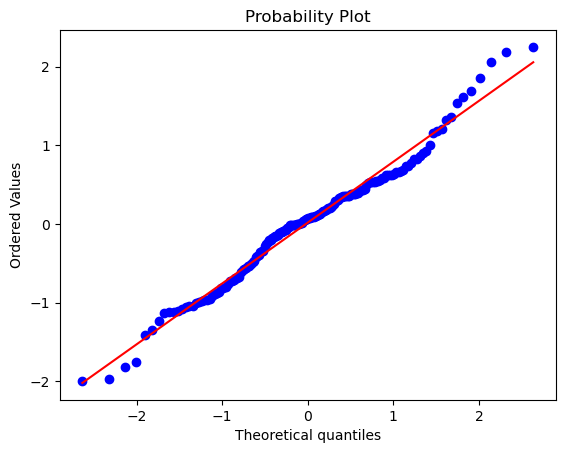

In [119]:
train_score = lr.score(X_train, y_train)
print('train_score',train_score)

test_score = lr.score(X_test, y_test)
print('test_score',test_score)




predictions = lr.predict(X_train)
residuals = y_train - predictions



from statsmodels.stats.stattools import durbin_watson
durbin_watson_test = durbin_watson(residuals)
print(durbin_watson_test)

from scipy.stats import probplot, shapiro
_, qq_plot = probplot(residuals, plot=plt)
shapiro_test = shapiro(residuals)


plt.show()

In [ ]:
# The given data is not normal.

In [123]:
sfs=SequentialFeatureSelector(estimator=lr,cv=3,scoring='r2',k_features='best')
sfs_model=sfs.fit(X_train,y_train)
sfs_model.k_feature_names_

('const',
 'aspiration',
 'doornumber',
 'carbody',
 'enginelocation',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'fuelsystem',
 'boreratio',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'companyname_low',
 'companyname_med')

In [124]:
sel_feature = list(sfs.k_feature_names_)

In [129]:
model_sfs = LinearRegression()
model_sfs.fit(X_train[sel_feature],y_train)
y_pred_sfs = model_sfs.predict(X_test[sel_feature])
y_pred_sfs_train = model_sfs.predict(X_train[sel_feature])
print('R square: ',r2_score(y_test,y_pred_sfs))
print('MSE: ',mean_squared_error(y_test,y_pred_sfs))
print('RMSE_Train: ',mean_squared_error(y_train,y_pred_sfs_train)**0.5)
print('RMSE_Test: ',mean_squared_error(y_test,y_pred_sfs)**0.5)


R square:  0.8751520881078193
MSE:  0.033874412381342485
RMSE_Train:  0.1301133315382974
RMSE_Test:  0.18405002684417757


In [130]:
from sklearn.linear_model import SGDRegressor

In [131]:
sgd=SGDRegressor()
sgd_model=sgd.fit(X_train ,y_train)

In [132]:
y_pred_sfs = sgd_model.predict(X_test)
y_pred_sfs_train = sgd_model.predict(X_train)
print('R square: ',r2_score(y_test,y_pred_sfs))
print('MSE: ',mean_squared_error(y_test,y_pred_sfs))
print('RMSE_Train: ',mean_squared_error(y_train,y_pred_sfs_train)**0.5)
print('RMSE_Test: ',mean_squared_error(y_test,y_pred_sfs)**0.5)

R square:  0.02205001268922524
MSE:  0.2653426930127827
RMSE_Train:  0.48255462115544595
RMSE_Test:  0.5151142523875482


In [ ]:
# We can see the SGD peforms best on the data as it is good fit.

In [136]:
lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = DecisionTreeRegressor()

In [139]:
model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)
r2_scores.append(r2_score(y_test, y_pred))
print('MSE_dt:',mean_squared_error(y_test, y_pred))
print('R2 Score_dt:', r2_score(y_test, y_pred))


MSE_dt: 0.01704374118125186
R2 Score_dt: 0.9371833975050128


In [148]:
model2 = RandomForestRegressor()
model2.fit(X_train_rfe, y_train)
y_pred = model2.predict(X_test_rfe)
r2_scores.append(r2_score(y_test, y_pred))
print('MSE_:',mean_squared_error(y_test, y_pred))
print('R2 Score_rf:', r2_score(y_test, y_pred))


MSE_rf: 0.015731962529972547
R2 Score_rf: 0.9420181035253944


In [147]:
model3 = GradientBoostingRegressor()
model3.fit(X_train_rfe, y_train)
y_pred = model3.predict(X_test_rfe)
r2_scores.append(r2_score(y_test, y_pred))
print('MSE_gdb:',mean_squared_error(y_test, y_pred))
print('R2 Score_gdb:', r2_score(y_test, y_pred))

MSE_gdb: 0.016160825949068886
R2 Score_gdb: 0.9404374797271611


#After Checking the MSE and R2 score of each model
#Final Best model  with min(MSE value) and Max(R2-score)


# So best Model is RandomForestRegressor.

Final Interpritation:
The car price is highly correlated with features such as engine size, horsepower, curb weight, and highway mpg. 
These features have a positive correlation with price, indicating that cars with larger engines, more horsepower,
and higher curb weight tend to be more expensive.
The linear regression model performed well with an R^2 score of 0.86.
This means that 86% of the variance in car prices is explained by the model.
The decision tree and gradient boosting models and extreme grading boost  performed better than the linear regression model.
Even after finding best features using sequential feature search and after g=fitting it with lr it performed better than lr
while the random forest model performed the best with an r2 score of 0.94.

